In [3]:
import matplotlib
import pandas as pd
import numpy as np
import requests
import tweepy
import os
import json
import time
import re
import matplotlib.pyplot as plt
import warnings
import seaborn as sns
from timeit import default_timer as timer
from tweepy import OAuthHandler
%matplotlib inline

<h1>Gather:</h1><br>
<h3>1-twitter archive<h3>

In [4]:
Archive_df = pd.read_csv('twitter-archive-enhanced.csv')
Archive_df.head(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [5]:
Archive_df.tail(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a Japanese Irish Setter. Lost eye...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888...,8,10,None,None,None,None,None


In [6]:
Archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

<h3>2-image predictions</h3>

In [7]:
url="https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name =url.split("/")[-1]
response = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as f:
        f.write(response.content)

In [8]:
image_predictions_df = pd.read_csv('image-predictions.tsv', sep='\t')


In [9]:
image_predictions_df.head(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


<h3>3-twitter api<h3>

In [10]:
# consumer_key = 'HIDDEN'
# consumer_secret = 'HIDDEN'
# access_token = 'HIDDEN'
# access_secret = 'HIDDEN'

# auth = OAuthHandler(consumer_key, consumer_secret)
# auth.set_access_token(access_token, access_secret)

# api = tweepy.API(auth, wait_on_rate_limit=True)

In [11]:
# tweet_ids = df_twitter_Archive.tweet_id.values
# len(tweet_ids)

In [12]:
# count = 0
# fails_dict = {}
# start = timer()
# # Save each tweet's returned JSON as a new line in a .txt file
# with open('tweet_json.txt', 'w') as outfile:
#     # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
#     for tweet_id in tweet_ids:
#         count += 1
#         print(str(count) + ": " + str(tweet_id))
#         try:
#             tweet = api.get_status(tweet_id, tweet_mode='extended')
#             print("Success")
#             json.dump(tweet._json, outfile)
#             outfile.write('\n')
#         except tweepy.TweepError as e:
#             print("Fail")
#             fails_dict[tweet_id] = e
#             pass
# end = timer()
# print(end - start)
# print(fails_dict)

In [13]:
df_list = []

with open('tweet-json.txt', 'r') as file:
    for f in file:
        tweet = json.loads(f)
        tweet_id = tweet['id']
        retweet_count = tweet['retweet_count']
        fav_count = tweet['favorite_count']
        user_count = tweet['user']['followers_count']
        df_list.append({'tweet_id':tweet_id,
                       'retweet_count': retweet_count,
                       'favorite_count': fav_count,
                       'user_count': user_count})
        
api_df = pd.DataFrame(df_list,columns=['tweet_id','retweet_count','favorite_count','user_count'])
api_df.head()

,tweet_id,retweet_count,favorite_count,user_count
0,892420643555336193,8853,39467,3200889
1,892177421306343426,6514,33819,3200889
2,891815181378084864,4328,25461,3200889
3,891689557279858688,8964,42908,3200889
4,891327558926688256,9774,41048,3200889


In [14]:
api_df.count()

tweet_id          2354
retweet_count     2354
favorite_count    2354
user_count        2354
dtype: int64

In [15]:
api_df.tail()

,tweet_id,retweet_count,favorite_count,user_count
2349,666049248165822465,41,111,3201018
2350,666044226329800704,147,311,3201018
2351,666033412701032449,47,128,3201018
2352,666029285002620928,48,132,3201018
2353,666020888022790149,532,2535,3201018


In [16]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


#### end of Gathering
> - Archive_df - has the data read from provided csv
> - image_predictions_df - has the data read (by using requests) from tsv file hosted on server
> - api_df - has the data obtained from twitter handle by using tweepy library and creating a twitter app for oauth

<h2>Assessing Data</h2>

<h1>1-Archive_df</h1>

In [17]:
Archive_df.sample(15)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
858,763837565564780549,NaN,NaN,2016-08-11 20:40:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Alfie. He's touching a butt. Couldn't ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/763837565...,11,10,Alfie,None,None,None,None
1982,672968025906282496,NaN,NaN,2015-12-05 02:37:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Gustaf. He's a purebred Chevy Equinox....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/672968025...,11,10,Gustaf,None,None,None,None
72,878604707211726852,NaN,NaN,2017-06-24 13:24:20 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Martha is stunning how h*ckin dare you. 13/10 ...,NaN,NaN,NaN,https://twitter.com/bbcworld/status/8785998685...,13,10,None,None,None,None,None
1117,732375214819057664,NaN,NaN,2016-05-17 01:00:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Kyle (pronounced 'Mitch'). He strives ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/732375214...,11,10,Kyle,doggo,None,None,None
280,839549326359670784,NaN,NaN,2017-03-08 18:52:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Winston. He knows he's a little too big f...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/839549326...,12,10,Winston,None,None,None,None
1520,690728923253055490,NaN,NaN,2016-01-23 02:53:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Vinscent. He was just questioned about...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/690728923...,8,10,Vinscent,None,None,None,None
338,832369877331693569,NaN,NaN,2017-02-16 23:23:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Charlie. He fell asleep on a heating v...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/832369877...,11,10,Charlie,None,None,None,None
2032,671763349865160704,NaN,NaN,2015-12-01 18:50:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Say hello to Mark. He's a good dog. Always rea...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/671763349...,9,10,Mark,None,None,None,None
2285,667188689915760640,NaN,NaN,2015-11-19 03:52:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Quite an advanced dog here. Impressively dress...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/667188689...,10,10,None,None,None,None,None
215,851224888060895234,NaN,NaN,2017-04-10 00:06:42 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Snoop. His number one passion is sticking...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/851224888...,13,10,Snoop,None,None,None,None


In [18]:
Archive_df.source.value_counts()

<a href="http://twitter.com/download/iphone" rel="nofollow">Twitter for iPhone</a>     2221
<a href="http://vine.co" rel="nofollow">Vine - Make a Scene</a>                          91
<a href="http://twitter.com" rel="nofollow">Twitter Web Client</a>                       33
<a href="https://about.twitter.com/products/tweetdeck" rel="nofollow">TweetDeck</a>      11
Name: source, dtype: int64

In [19]:
Archive_df.query('rating_numerator > 20')

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None
290,838150277551247360,8.381455e+17,2.195506e+07,2017-03-04 22:12:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@markhoppus 182/10,NaN,NaN,NaN,NaN,182,10,None,None,None,None,None
313,835246439529840640,8.352460e+17,2.625958e+07,2017-02-24 21:54:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@jonnysun @Lin_Manuel ok jomny I know you're e...,NaN,NaN,NaN,NaN,960,0,None,None,None,None,None
340,832215909146226688,NaN,NaN,2017-02-16 13:11:49 +0000,"<a href=""http://twitter.com/download/iphone"" r...","RT @dog_rates: This is Logan, the Chow who liv...",7.867091e+17,4.196984e+09,2016-10-13 23:23:56 +0000,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
433,820690176645140481,NaN,NaN,2017-01-15 17:52:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",The floofs have been released I repeat the flo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/820690176...,84,70,None,None,None,None,None
516,810984652412424192,NaN,NaN,2016-12-19 23:06:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Sam. She smiles 24/7 &amp; secretly aspir...,NaN,NaN,NaN,"https://www.gofundme.com/sams-smile,https://tw...",24,7,Sam,None,None,None,None
695,786709082849828864,NaN,NaN,2016-10-13 23:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...","This is Logan, the Chow who lived. He solemnly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/786709082...,75,10,Logan,None,None,None,None
763,778027034220126208,NaN,NaN,2016-09-20 00:24:34 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Sophie. She's a Jubilant Bush Pupper. ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/778027034...,27,10,Sophie,None,None,pupper,None
902,758467244762497024,NaN,NaN,2016-07-28 01:00:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Why does this never happen at my front door......,NaN,NaN,NaN,https://twitter.com/dog_rates/status/758467244...,165,150,None,None,None,None,None


In [20]:
Archive_df[Archive_df['name'].apply(len)<=2]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
393,825876512159186944,NaN,NaN,2017-01-30 01:21:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Mo. No one will push him around in the...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/825876512...,11,10,Mo,None,None,None,None
446,819015337530290176,NaN,NaN,2017-01-11 02:57:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He was a very good ...,8.190048e+17,4.196984e+09,2017-01-11 02:15:36 +0000,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
449,819004803107983360,NaN,NaN,2017-01-11 02:15:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He was a very good First Doggo. 14...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/819004803...,14,10,Bo,doggo,None,None,None
553,804026241225523202,NaN,NaN,2016-11-30 18:16:08 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's going to make me cry. 13/10 p...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/804026241...,13,10,Bo,None,None,None,None
583,800188575492947969,NaN,NaN,2016-11-20 04:06:37 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo. He's a Benedoop Cum...,6.816941e+17,4.196984e+09,2015-12-29 04:31:49 +0000,https://twitter.com/dog_rates/status/681694085...,11,10,Bo,None,None,pupper,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
679,789137962068021249,NaN,NaN,2016-10-20 16:15:26 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Bo. He's a West Congolese Bugaboop Snu...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/789137962...,12,10,Bo,None,None,None,None
686,788070120937619456,NaN,NaN,2016-10-17 17:32:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Bo and Ty. Bo eats pape...,7.610045e+17,4.196984e+09,2016-08-04 01:03:17 +0000,https://twitter.com/dog_rates/status/761004547...,11,10,Bo,None,None,None,None
759,778396591732486144,NaN,NaN,2016-09-21 00:53:04 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is an East African Chalupa...,7.030419e+17,4.196984e+09,2016-02-26 02:20:37 +0000,https://twitter.com/dog_rates/status/703041949...,10,10,an,None,None,None,None


In [21]:
Archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [22]:
Archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


<h1>2-df_image_predictions</h1>

In [23]:
image_predictions_df.sample(15)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
179,669324657376567296,https://pbs.twimg.com/media/CUnrN7vUcAAfGvN.jpg,1,seashore,0.201659,False,Cardigan,0.131544,True,sandbar,0.101430,False
1235,746507379341139972,https://pbs.twimg.com/media/Clwgf4bWgAAB15c.jpg,1,toy_poodle,0.508292,True,Lakeland_terrier,0.234458,True,affenpinscher,0.084563,True
1956,864873206498414592,https://pbs.twimg.com/media/DAClmHkXcAA1kSv.jpg,2,pole,0.478616,False,lakeside,0.114182,False,wreck,0.055926,False
49,666835007768551424,https://pbs.twimg.com/media/CUES51dXIAEahyG.jpg,1,Airedale,0.448459,True,toy_poodle,0.124030,True,teddy,0.110183,False
1755,824796380199809024,https://pbs.twimg.com/media/CwiuEJmW8AAZnit.jpg,2,gas_pump,0.676439,False,harvester,0.049995,False,swing,0.044660,False
1140,729823566028484608,https://pbs.twimg.com/media/CiDap8fWEAAC4iW.jpg,1,kelpie,0.218408,True,Arabian_camel,0.114368,False,coyote,0.096409,False
505,675891555769696257,https://pbs.twimg.com/media/CWE_x33UwAEE3no.jpg,1,Italian_greyhound,0.305637,True,whippet,0.232057,True,Great_Dane,0.117806,True
641,681320187870711809,https://pbs.twimg.com/media/CXSJGAQUQAAoG9Q.jpg,1,Samoyed,0.362596,True,Eskimo_dog,0.245395,True,Siberian_husky,0.108232,True
1138,729113531270991872,https://pbs.twimg.com/media/Ch5U4FzXEAAShhF.jpg,2,stone_wall,0.606188,False,prison,0.064831,False,bannister,0.048048,False
1027,710844581445812225,https://pbs.twimg.com/media/Cd1tYGmXIAAoW5b.jpg,1,dingo,0.536593,False,Pembroke,0.200407,True,basenji,0.060734,True


In [24]:
image_predictions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predictions_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


<h1>3-api_df</h1>

In [26]:
api_df.sample(15)

,tweet_id,retweet_count,favorite_count,user_count
2267,667509364010450944,2272,7148,3201016
1121,730427201120833536,1176,3809,3200944
1867,675153376133427200,2734,6072,3201003
1663,682750546109968385,494,1674,3200952
2088,670786190031921152,218,640,3201008
1901,674638615994089473,650,1806,3201003
2026,671866342182637568,548,1191,3201006
70,878776093423087618,4319,19763,3200892
2109,670442337873600512,213,690,3201009
189,855857698524602368,2313,12498,3200891


In [27]:
api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
tweet_id          2354 non-null int64
retweet_count     2354 non-null int64
favorite_count    2354 non-null int64
user_count        2354 non-null int64
dtypes: int64(4)
memory usage: 73.6 KB


In [28]:
api_df[api_df.duplicated('favorite_count',keep=False)]

,tweet_id,retweet_count,favorite_count,user_count
15,889278841981685760,5637,25652,3200889
31,886054160059072513,108,0,3200890
35,885311592912609280,19297,0,3200890
54,881633300179243008,7,129,3200890
67,879130579576475649,7181,0,3200892
72,878404777348136964,1349,0,3200892
73,878316110768087041,6965,0,3200892
77,877611172832227328,83,0,3200892
90,874434818259525634,15546,0,3200891
94,873697596434513921,12518,0,3200891


In [29]:
api_df.describe()

,tweet_id,retweet_count,favorite_count,user_count
count,2.354000e+03,2354.000000,2354.000000,2.354000e+03
mean,7.426978e+17,3164.797366,8080.968564,3.200942e+06
std,6.852812e+16,5284.770364,11814.771334,4.457302e+01
min,6.660209e+17,0.000000,0.000000,3.200799e+06
25%,6.783975e+17,624.500000,1415.000000,3.200898e+06
50%,7.194596e+17,1473.500000,3603.500000,3.200945e+06
75%,7.993058e+17,3652.000000,10122.250000,3.200953e+06
max,8.924206e+17,79515.000000,132810.000000,3.201018e+06


## Quality problems
#### Archive_df
> - some columns have NaN value instead of none
> - numerator and denominator columns have some invalid values
> - retweeted_status_timestamp, timestamp are strings instead of Date
> - in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id are float instead of integer
> - name column has some incorrect values

#### image_predictions_df
> - p1, p2 and p3 are strings instead of categoral datatype
> - p1_conf, p2_conf and p3_conf columns should be merged
> - p1_dog, p2_dog and p3_dog columns should be merged

## Tidiness problems
> - doggo,floofer,pupper,puppo are values not column names
> - tweet_id column is repeated in all 3 tables
> - image_predictions_df should only have jpg_url and tweet_id, no other information is required

<h2>cleaning data</h2>

In [177]:
Archive_df_clean=Archive_df.copy()
image_predictions_df_clean=image_predictions_df.copy()
api_df_clean=api_df.copy()

#### Define
merge the three tables together

#### Code

In [178]:
Archive_df_clean = pd.merge(left=Archive_df_clean,
                                 right=api_df_clean, left_on='tweet_id', right_on='tweet_id', how='inner')
Archive_df_clean = Archive_df_clean.merge(image_predictions_df_clean, on='tweet_id', how='inner')

#### Test

In [179]:
Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 31 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

In [180]:
Archive_df_clean.head(1)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,1,orange,0.097049,False,bagel,0.085851,False,banana,0.07611,False


#### Define
combine p1, p2 and p3 and confidence associated columns

#### Code

In [181]:
pre = []
con = []

def get_prediction_confidence(dataframe):
    if dataframe['p1_dog'] == True:
        pre.append(dataframe['p1'])
        con.append(dataframe['p1_conf'])
    elif dataframe['p2_dog'] == True:
        pre.append(dataframe['p2'])
        con.append(dataframe['p2_conf'])
    elif dataframe['p3_dog'] == True:
        pre.append(dataframe['p3'])
        con.append(dataframe['p3_conf'])
    else:
        pre.append('NaN')
        con.append(0)

Archive_df_clean.apply(get_prediction_confidence, axis=1)
Archive_df_clean['prediction'] = pre
Archive_df_clean['confidence'] = con

In [182]:
Archive_df_clean = Archive_df_clean.drop(['img_num', 'p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog'], 1)

#### Test

In [183]:
Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2073 entries, 0 to 2072
Data columns (total 23 columns):
tweet_id                      2073 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2073 non-null object
source                        2073 non-null object
text                          2073 non-null object
retweeted_status_id           79 non-null float64
retweeted_status_user_id      79 non-null float64
retweeted_status_timestamp    79 non-null object
expanded_urls                 2073 non-null object
rating_numerator              2073 non-null int64
rating_denominator            2073 non-null int64
name                          2073 non-null object
doggo                         2073 non-null object
floofer                       2073 non-null object
pupper                        2073 non-null object
puppo                         2073 non-null object
retweet_count                 2073 

#### Define
melt doggo,floofer,pupper and puppo columns into one column stage.

#### Code

In [184]:
melt = ['doggo', 'floofer', 'pupper', 'puppo']
s = [x for x in Archive_df_clean.columns.tolist() if x not in melt]
Archive_df_clean= pd.melt(Archive_df_clean,id_vars = s, value_vars = melt, 
                          var_name = 'stages', value_name = 'stage')

In [185]:
Archive_df_clean = Archive_df_clean.drop('stages', 1)

#### Test

In [186]:
Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8292 entries, 0 to 8291
Data columns (total 20 columns):
tweet_id                      8292 non-null int64
in_reply_to_status_id         92 non-null float64
in_reply_to_user_id           92 non-null float64
timestamp                     8292 non-null object
source                        8292 non-null object
text                          8292 non-null object
retweeted_status_id           316 non-null float64
retweeted_status_user_id      316 non-null float64
retweeted_status_timestamp    316 non-null object
expanded_urls                 8292 non-null object
rating_numerator              8292 non-null int64
rating_denominator            8292 non-null int64
name                          8292 non-null object
retweet_count                 8292 non-null int64
favorite_count                8292 non-null int64
user_count                    8292 non-null int64
jpg_url                       8292 non-null object
prediction                    8292 

In [187]:
Archive_df_clean.stage.value_counts()

None       7959
pupper      221
doggo        80
puppo        24
floofer       8
Name: stage, dtype: int64

#### Define
Deleting duplicate rows and unimportant columns

#### Code

In [188]:
Archive_df_clean = Archive_df_clean[pd.isnull(Archive_df_clean.retweeted_status_id)]
Archive_df_clean = Archive_df_clean.drop('retweeted_status_id', 1)
Archive_df_clean = Archive_df_clean.drop('retweeted_status_user_id', 1)
Archive_df_clean = Archive_df_clean.drop('retweeted_status_timestamp', 1)
Archive_df_clean = Archive_df_clean.drop_duplicates()
Archive_df_clean = Archive_df_clean.dropna(subset = ['jpg_url'])
Archive_df_clean = Archive_df_clean.sort_values('stage').drop_duplicates('tweet_id', keep = 'last')

#### Test

In [189]:
print("records' number", len(Archive_df_clean))
Archive_df_clean.info()
Archive_df_clean.head()

records' number 1994
<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 7108
Data columns (total 17 columns):
tweet_id                 1994 non-null int64
in_reply_to_status_id    23 non-null float64
in_reply_to_user_id      23 non-null float64
timestamp                1994 non-null object
source                   1994 non-null object
text                     1994 non-null object
expanded_urls            1994 non-null object
rating_numerator         1994 non-null int64
rating_denominator       1994 non-null int64
name                     1994 non-null object
retweet_count            1994 non-null int64
favorite_count           1994 non-null int64
user_count               1994 non-null int64
jpg_url                  1994 non-null object
prediction               1994 non-null object
confidence               1994 non-null float64
stage                    1994 non-null object
dtypes: float64(3), int64(6), object(8)
memory usage: 280.4+ KB


,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,prediction,confidence,stage
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,NaN,0.000000,None
1465,680055455951884288,NaN,NaN,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,8067,18278,3200953,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,Samoyed,0.995466,None
1464,680070545539371008,NaN,NaN,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,994,2818,3200953,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811,None
1463,680085611152338944,NaN,NaN,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,10034,13959,3200953,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,NaN,0.000000,None
1461,680115823365742593,NaN,NaN,2015-12-24 20:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,1028,2972,3200953,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,pug,0.999365,None


#### Define
drop in_reply_to_user_id,in_reply_to_status_id because it has only on few values

#### Code

In [190]:
print('in_reply_to_user_id ')
print(Archive_df_clean['in_reply_to_user_id'].value_counts())
print('in_reply_to_status_id')
print(Archive_df_clean['in_reply_to_status_id'].value_counts())

in_reply_to_user_id 
4.196984e+09    23
Name: in_reply_to_user_id, dtype: int64
in_reply_to_status_id
6.671522e+17    2
8.558181e+17    1
6.753494e+17    1
6.747934e+17    1
6.747522e+17    1
7.468859e+17    1
6.706684e+17    1
6.844811e+17    1
6.749998e+17    1
6.842229e+17    1
7.291135e+17    1
6.754971e+17    1
6.717299e+17    1
6.715610e+17    1
7.030419e+17    1
6.757073e+17    1
7.590995e+17    1
6.914169e+17    1
7.032559e+17    1
6.678065e+17    1
6.920419e+17    1
7.331095e+17    1
Name: in_reply_to_status_id, dtype: int64


In [191]:
Archive_df_clean = Archive_df_clean.drop(['in_reply_to_status_id', 'in_reply_to_user_id'], 1)

#### Test

In [192]:
Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1994 entries, 0 to 7108
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null int64
rating_denominator    1994 non-null int64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
user_count            1994 non-null int64
jpg_url               1994 non-null object
prediction            1994 non-null object
confidence            1994 non-null float64
stage                 1994 non-null object
dtypes: float64(1), int64(6), object(8)
memory usage: 249.2+ KB


#### Define
Fix rating numerator and denominators invalid values.

#### Code

In [193]:
text_ratings_to_fix = Archive_df_clean[Archive_df_clean.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].text
text_ratings_to_fix

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  """Entry point for launching an IPython kernel.


1405    This is Darrel. He just robbed a 7/11 and is i...
1527    Meet Tassy &amp; Bee. Tassy is pretty chill, b...
1561    These two pups just met and have instantly bon...
1234    Meet Oliviér. He takes killer selfies. Has a d...
1229    This may be the greatest video I've ever been ...
1139    This is Socks. That water pup w the super legs...
1627    Two gorgeous dogs here. Little waddling dog is...
1269    When bae says they can't go out but you see th...
1295    Meet Fynn &amp; Taco. Fynn is an all-powerful ...
1284    This is Eriq. His friend just reminded him of ...
1981    This is Kial. Kial is either wearing a cape, w...
1990    Two dogs in this one. Both are rare Jujitsu Py...
1897    Here we have Pancho and Peaches. Pancho is a C...
1934    This is Spark. He's nervous. Other dog hasn't ...
2023    These are Peruvian Feldspars. Their names are ...
2052    This is an Albanian 3 1/2 legged  Episcopalian...
1732    10/10 for dog. 7/10 for cat. 12/10 for human. ...
1834    Meet H

In [194]:
for entry in text_ratings_to_fix:
    mask = Archive_df_clean.text == entry
    column_name1 = 'rating_numerator'
    column_name2 = 'rating_denominator'
    Archive_df_clean.loc[mask, column_name1] = re.findall(r"\d+\.?\d*\/\d+\.?\d*\D+(\d+\.?\d*)\/\d+\.?\d*", entry)
    Archive_df_clean.loc[mask, column_name2] = 10

#### Test

In [195]:
Archive_df_clean[Archive_df_clean.text.isin(text_ratings_to_fix)]

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,prediction,confidence,stage
1405,682962037429899265,2016-01-01 16:30:13 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darrel. He just robbed a 7/11 and is i...,https://twitter.com/dog_rates/status/682962037...,10,10,Darrel,15043,26239,3200952,https://pbs.twimg.com/media/CXpeVzQW8AApKYb.jpg,Chihuahua,0.155207,None
1527,677314812125323265,2015-12-17 02:30:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Meet Tassy &amp; Bee. Tassy is pretty chill, b...",https://twitter.com/dog_rates/status/677314812...,11,10,Tassy,611,1799,3200953,https://pbs.twimg.com/media/CWZOOIUW4AAQrX_.jpg,Blenheim_spaniel,0.924127,None
1561,676191832485810177,2015-12-14 00:07:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",These two pups just met and have instantly bon...,https://twitter.com/dog_rates/status/676191832...,7,10,None,1145,2478,3201002,https://pbs.twimg.com/media/CWJQ4UmWoAIJ29t.jpg,Chihuahua,0.376741,None
1234,694352839993344000,2016-02-02 02:53:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Oliviér. He takes killer selfies. Has a d...,https://twitter.com/dog_rates/status/694352839...,5,10,Oliviér,700,2244,3200950,https://pbs.twimg.com/media/CaLWOPfWkAAo2Dt.jpg,Australian_terrier,0.407886,None
1229,695064344191721472,2016-02-04 02:00:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This may be the greatest video I've ever been ...,https://twitter.com/dog_rates/status/695064344...,13,10,None,685,1771,3200950,https://pbs.twimg.com/ext_tw_video_thumb/69506...,NaN,0.000000,None
1139,703356393781329922,2016-02-26 23:10:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Socks. That water pup w the super legs...,https://twitter.com/dog_rates/status/703356393...,2,10,Socks,429,2085,3200949,https://pbs.twimg.com/media/CcLS6QKUcAAUuPa.jpg,Border_collie,0.894842,None
1627,674646392044941312,2015-12-09 17:46:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Two gorgeous dogs here. Little waddling dog is...,https://twitter.com/dog_rates/status/674646392...,8,10,None,557,1533,3201003,https://pbs.twimg.com/media/CVzTUGrW4AAirJH.jpg,flat-coated_retriever,0.837448,None
1269,691483041324204033,2016-01-25 04:49:38 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When bae says they can't go out but you see th...,https://twitter.com/dog_rates/status/691483041...,10,10,None,656,2608,3200950,https://pbs.twimg.com/media/CZikKBIWYAA40Az.jpg,bloodhound,0.886232,None
1295,689835978131935233,2016-01-20 15:44:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Fynn &amp; Taco. Fynn is an all-powerful ...,https://twitter.com/dog_rates/status/689835978...,10,10,Fynn,850,2369,3200950,https://pbs.twimg.com/media/CZLKJpDWQAA-5u4.jpg,collie,0.600186,None
1284,690400367696297985,2016-01-22 05:07:29 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Eriq. His friend just reminded him of ...,https://twitter.com/dog_rates/status/690400367...,6,10,Eriq,509,2041,3200951,https://pbs.twimg.com/media/CZTLeBuWIAAFkeR.jpg,Pembroke,0.426459,None


#### Define
convert NaN values to none

#### Code

In [196]:
Archive_df_clean.loc[Archive_df_clean['prediction'] == 'NaN', 'prediction'] = None
Archive_df_clean.loc[Archive_df_clean['rating_numerator'] == 'NaN', 'rating_numerator'] = 0

#### Test

In [197]:
Archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,retweet_count,favorite_count,user_count,jpg_url,prediction,confidence,stage
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,8853,39467,3200889,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,None,0.000000,None
1465,680055455951884288,2015-12-24 16:00:30 +0000,"<a href=""https://about.twitter.com/products/tw...","Meet Sammy. At first I was like ""that's a snow...",https://twitter.com/dog_rates/status/680055455...,10,10,Sammy,8067,18278,3200953,https://pbs.twimg.com/media/CW-ZRC_WQAAyFrL.jpg,Samoyed,0.995466,None
1464,680070545539371008,2015-12-24 17:00:27 +0000,"<a href=""https://about.twitter.com/products/tw...",Say hello to Emmie. She's trapped in an orname...,https://twitter.com/dog_rates/status/680070545...,9,10,Emmie,994,2818,3200953,https://pbs.twimg.com/media/CW-dU34WQAANBGy.jpg,Shih-Tzu,0.121811,None
1463,680085611152338944,2015-12-24 18:00:19 +0000,"<a href=""https://about.twitter.com/products/tw...",This is by far the most coordinated series of ...,https://twitter.com/dog_rates/status/680085611...,12,10,by,10034,13959,3200953,https://pbs.twimg.com/media/CXAiiHUWkAIN_28.jpg,None,0.000000,None
1461,680115823365742593,2015-12-24 20:00:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Ozzy. He woke up 2 minutes before he h...,https://twitter.com/dog_rates/status/680115823...,9,10,Ozzy,1028,2972,3200953,https://pbs.twimg.com/media/CXBBurSWMAELewi.jpg,pug,0.999365,None


#### Define
correct all incorrect datatypes.
#### Code

In [198]:
Archive_df_clean['tweet_id'] = Archive_df_clean['tweet_id'].astype(str)
Archive_df_clean['timestamp'] = pd.to_datetime(Archive_df_clean.timestamp)
Archive_df_clean['source'] = Archive_df_clean['source'].astype('category')
Archive_df_clean['stage'] = Archive_df_clean['stage'].astype('category')
Archive_df_clean['retweet_count'] = Archive_df_clean['retweet_count'].astype(int)
Archive_df_clean['favorite_count'] = Archive_df_clean['favorite_count'].astype(int)
Archive_df_clean['user_count'] = Archive_df_clean['user_count'].astype(int)
Archive_df_clean['rating_numerator'] = Archive_df_clean['rating_numerator'].astype(float)
Archive_df_clean['rating_denominator'] = Archive_df_clean['rating_denominator'].astype(float)

#### Test

In [199]:
Archive_df_clean.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                      category
text                          object
expanded_urls                 object
rating_numerator             float64
rating_denominator           float64
name                          object
retweet_count                  int64
favorite_count                 int64
user_count                     int64
jpg_url                       object
prediction                    object
confidence                   float64
stage                       category
dtype: object

## Store the cleaned data

In [200]:
Archive_df_clean.drop(Archive_df_clean.columns[Archive_df_clean.columns.str.contains('Unnamed',case = False)],axis = 1)
Archive_df_clean.to_csv('twitter_archive_master.csv', encoding = 'utf-8', index=False)

In [201]:
Archive_df_clean = pd.read_csv('twitter_archive_master.csv')
Archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1994 entries, 0 to 1993
Data columns (total 15 columns):
tweet_id              1994 non-null int64
timestamp             1994 non-null object
source                1994 non-null object
text                  1994 non-null object
expanded_urls         1994 non-null object
rating_numerator      1994 non-null float64
rating_denominator    1994 non-null float64
name                  1994 non-null object
retweet_count         1994 non-null int64
favorite_count        1994 non-null int64
user_count            1994 non-null int64
jpg_url               1994 non-null object
prediction            1686 non-null object
confidence            1994 non-null float64
stage                 1994 non-null object
dtypes: float64(3), int64(4), object(8)
memory usage: 233.8+ KB


## Visualization 1 
#### Correlation Heat Map

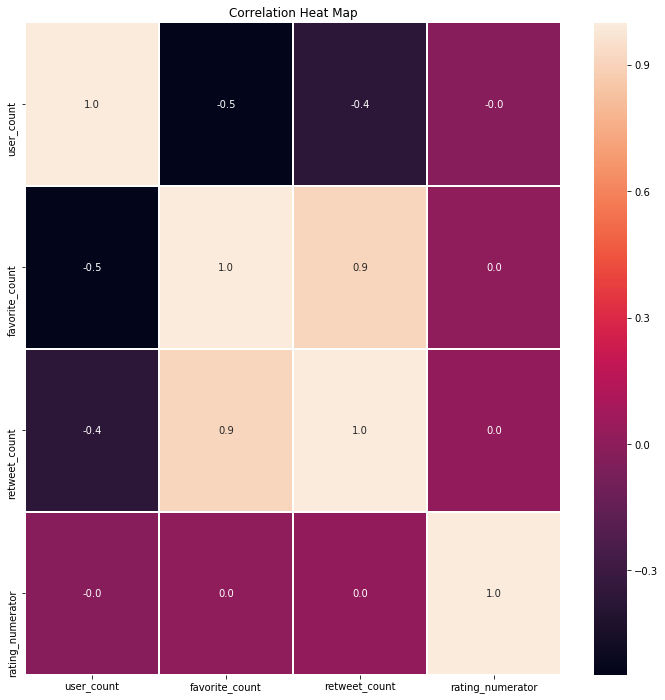

In [220]:
x,y = plt.subplots(figsize=(12, 12))
sns.heatmap(Archive_df_clean[['source','user_count','favorite_count','retweet_count',
               'rating_numerator']].corr(), annot=True, linewidths=.8, fmt= '.1f',ax=y)
plt.title('Correlation Heat Map')
plt.savefig('vis1.png')

#### Correlations
> - there is a Strong correlation between favorites and retweets.
> - there is a Negative correlation between user followers and retweets.

## Visualization 2 
#### pie chart on stage column

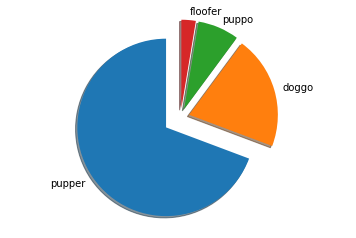

In [221]:
stage = list(Archive_df_clean[Archive_df_clean['stage'] != 'None']['stage'].value_counts())[0:4]
stages = Archive_df_clean[Archive_df_clean['stage'] != 'None']['stage'].value_counts().index.tolist()[0:4]
explode = (0.2, 0.1, 0.1, 0.1) 

figure1, axis1 = plt.subplots()
axis1.pie(stage, explode = explode, labels = stages, shadow = True, startangle = 90)
axis1.axis('equal')
plt.savefig('vis2.png')

> - Pupper in dog stage of dog life cycle get most tweets.

## Visualization 3
#### Scatter plot between favorite_count and retweet_count.

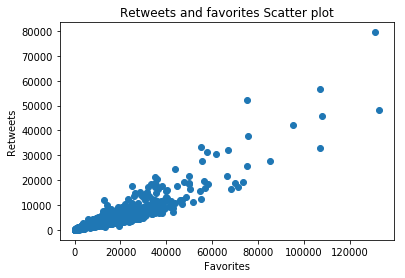

In [222]:
plt.scatter(Archive_df_clean['favorite_count'], Archive_df_clean['retweet_count'])
plt.xlabel('Favorites')
plt.ylabel('Retweets')
plt.title('Retweets and favorites Scatter plot')
plt.savefig('vis3.png')

> - Strong correlation between favorites and retweets.

## Visualization 4

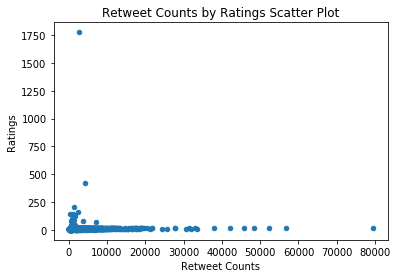

In [223]:
Archive_df_clean.plot(x='retweet_count', y='rating_numerator', kind='scatter')
plt.xlabel('Retweet Counts')
plt.ylabel('Ratings')
plt.title('Retweet Counts by Ratings Scatter Plot')
plt.savefig('vis4.png')